In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv('C:\\Users\\DR.SAGNIK\\.ipynb_checkpoints\\train.csv')


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#All good projects start with answering a few questions.
# First few basic questions:
# 1. Who were the passengers on Titanic? (Ages,Gender,Class...)
# 2. What deck were the passengers on and how does that related to their class?
# 3. Where did the passengers come from?
# 4. Who was alone & who was with family?


# Then we will dig deeper with the broader question:
# 5. What factors helped someone survive the sinking?

In [5]:
# 1. Who were the passengers on Titanic?


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

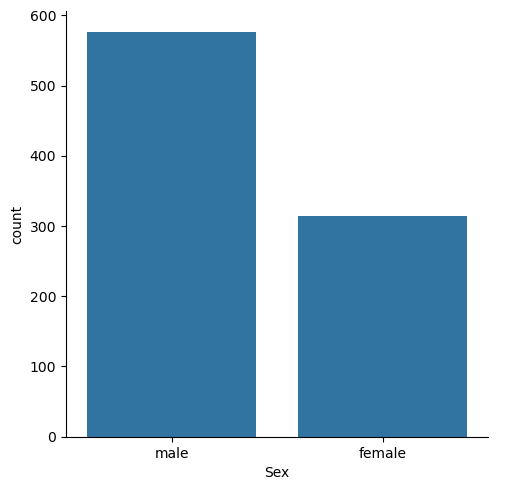

In [6]:
sns.catplot(x='Sex', data=titanic_df, kind='count')
plt.show()

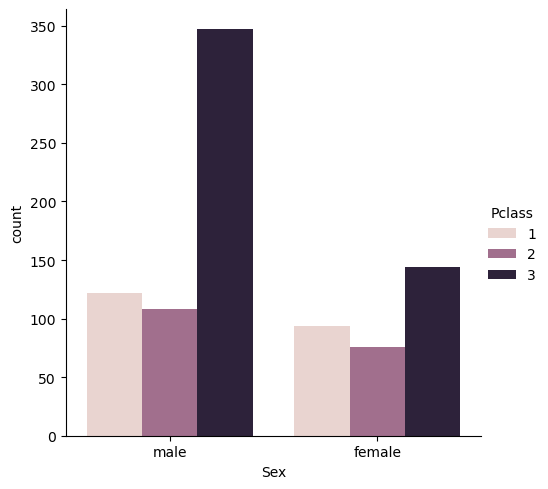

In [7]:
sns.catplot(x='Sex', data=titanic_df, hue='Pclass', kind='count')
plt.show()

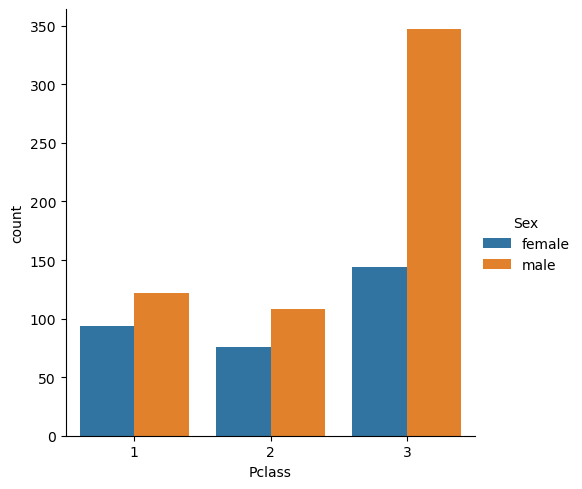

In [8]:
sns.catplot(x='Pclass', data=titanic_df, hue='Sex', kind='count')
plt.show()

In [9]:
def male_female_child(passenger):
    age,sex = passenger

    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [11]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


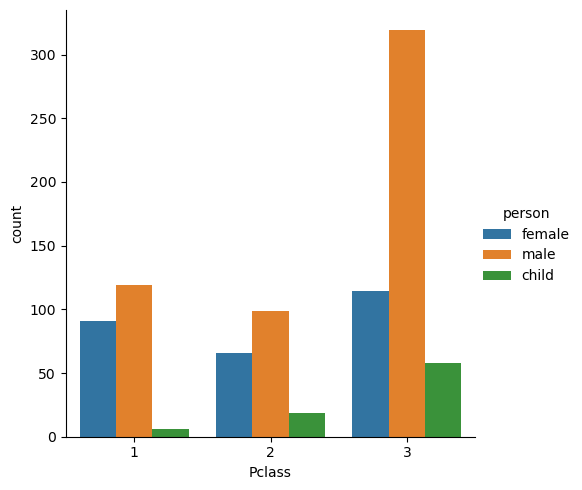

In [12]:
sns.catplot(x='Pclass', kind='count', data=titanic_df,hue='person')

plt.show()


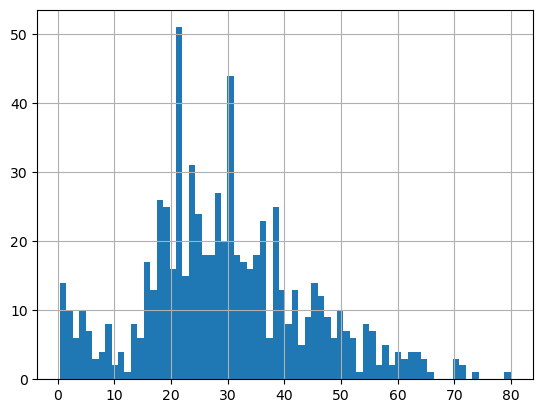

In [13]:
titanic_df['Age'].hist(bins=70)
plt.show()

In [14]:
titanic_df['person'].value_counts()

person
male      537
female    271
child      83
Name: count, dtype: int64

In [15]:
titanic_df['Age'].mean()

29.69911764705882

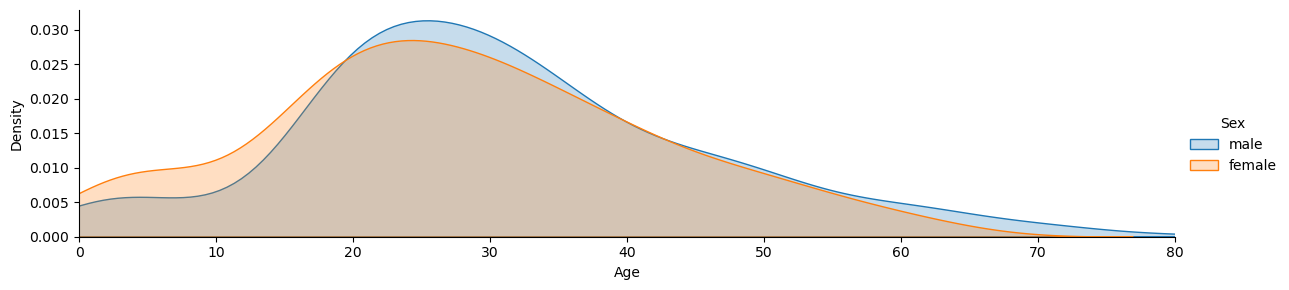

In [16]:
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)  # use fill instead of shade
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()
plt.show() 

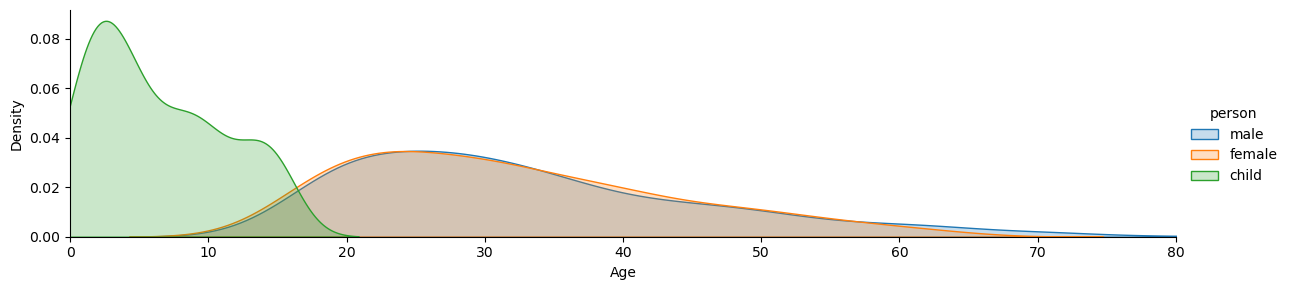

In [17]:
fig = sns.FacetGrid(titanic_df, hue="person", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)  # use fill instead of shade
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()
plt.show() 

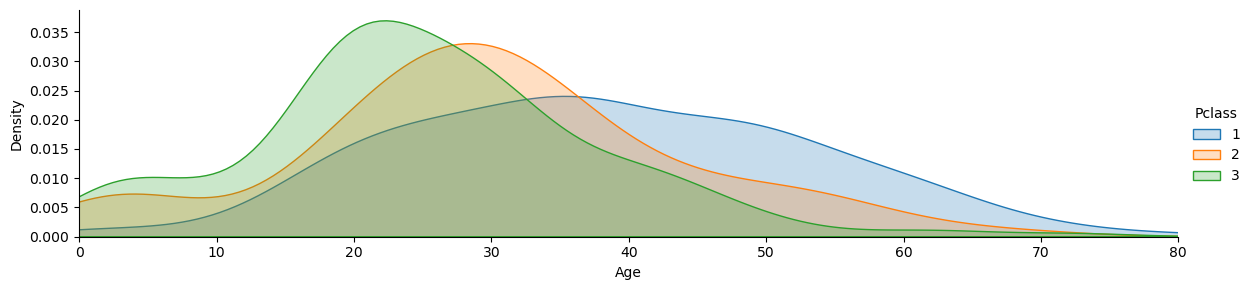

In [18]:
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)  # use fill instead of shade
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()
plt.show() 

In [19]:
# Moving on to our 2nd question
# What deck were the passengers on and how does that related to their class?

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

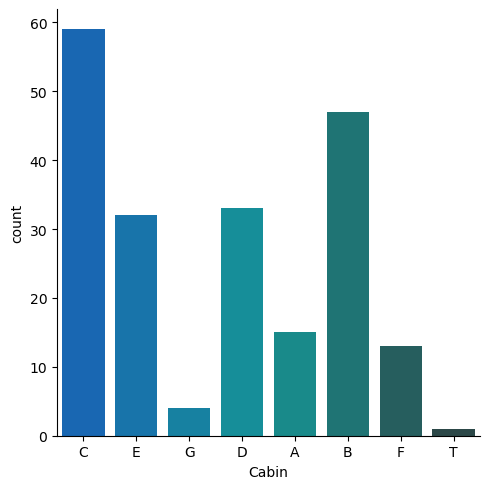

In [22]:
levels = []
for level in deck:
    levels.append(level[0]) 
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x='Cabin', hue='Cabin', data=cabin_df, palette='winter_d', kind='count', legend=False)
plt.show()

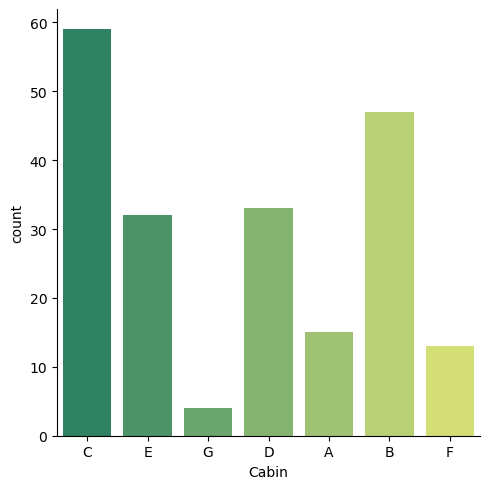

In [23]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin', hue='Cabin', data=cabin_df, palette='summer', kind='count', legend=False)
plt.show()

In [42]:
# 3rd question
# Where did the passengers come from?

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


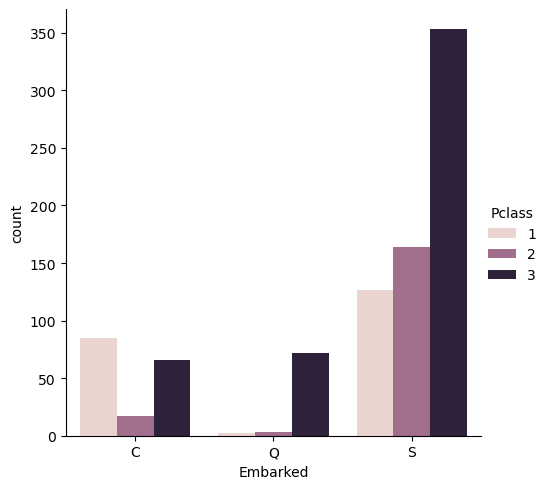

In [25]:
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', order=['C','Q','S'], kind='count')
plt.show()

In [49]:
# 4th question
# Who was alone & who was with family?

In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [27]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [32]:
titanic_df['Alone'] = pd.to_numeric(titanic_df['Alone'], errors='coerce')
titanic_df['Alone'] = np.where(titanic_df['Alone'] > 0, 'With Family', 'Alone')

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


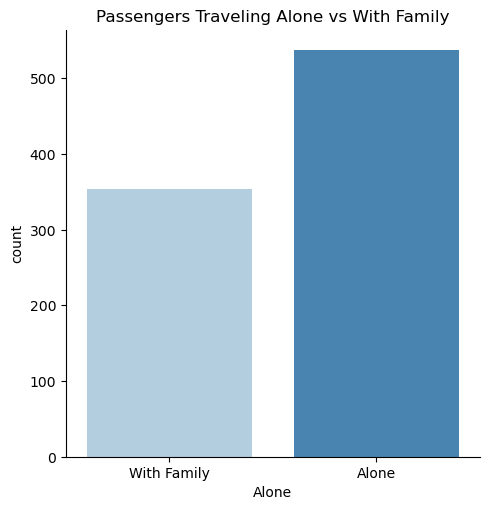

In [34]:
titanic_df['Alone'] = titanic_df.apply(lambda x: 'Alone' if (x['SibSp'] == 0 and x['Parch'] == 0) else 'With Family', axis=1)

sns.catplot(
    x='Alone',
    hue='Alone',
    data=titanic_df,
    kind='count',
    palette='Blues',
    legend=False
)
plt.title("Passengers Traveling Alone vs With Family")
plt.show()

In [64]:
# 5th and last question: What factors helped someone survive the sinking?

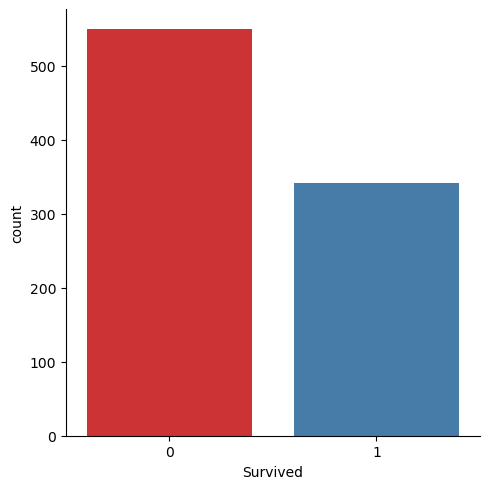

In [36]:
sns.catplot(x='Survived', hue='Survived', data=titanic_df, kind='count', palette='Set1', legend=False)
plt.show()


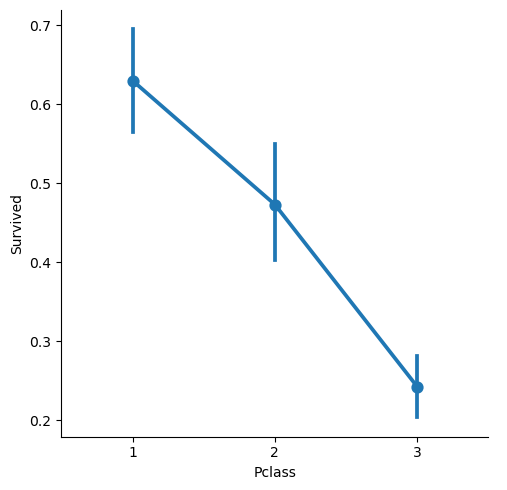

In [37]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df, kind='point')

plt.show()

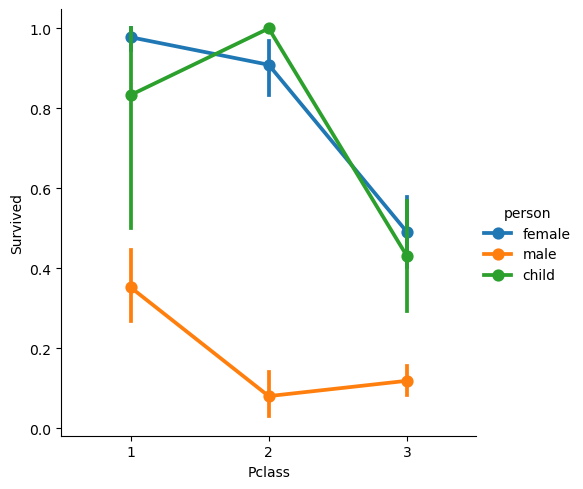

In [38]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df, hue='person',kind='point')

plt.show()

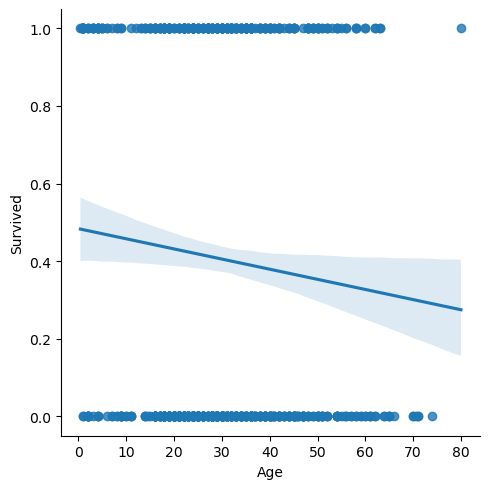

In [39]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)
plt.show()
#older the passenger, lesser they survived

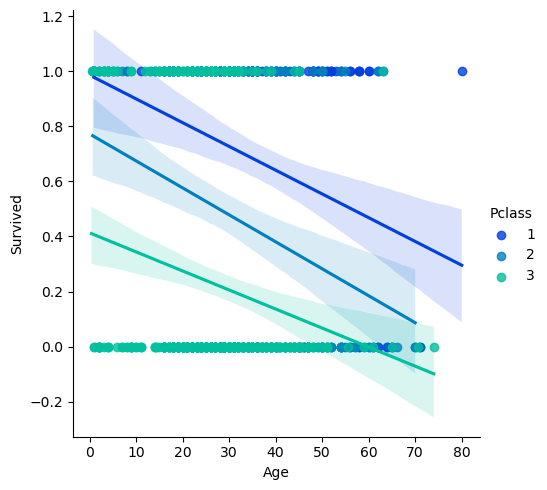

In [40]:
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter');
plt.show()

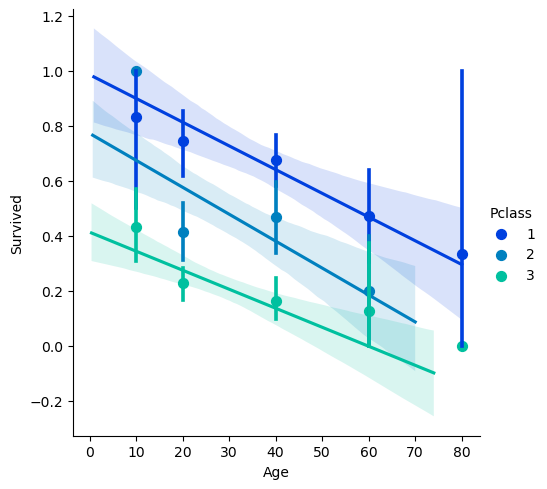

In [41]:
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

plt.show()

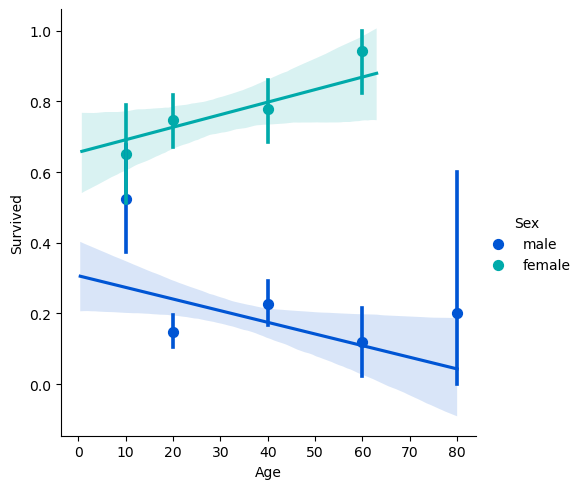

In [42]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations);
plt.show()

      Deck  Survived
0        A  0.466667
1        B  0.744681
2        C  0.593220
3        D  0.757576
4        E  0.750000
5        F  0.615385
6        G  0.500000
7        T  0.000000
8  Unknown  0.299854


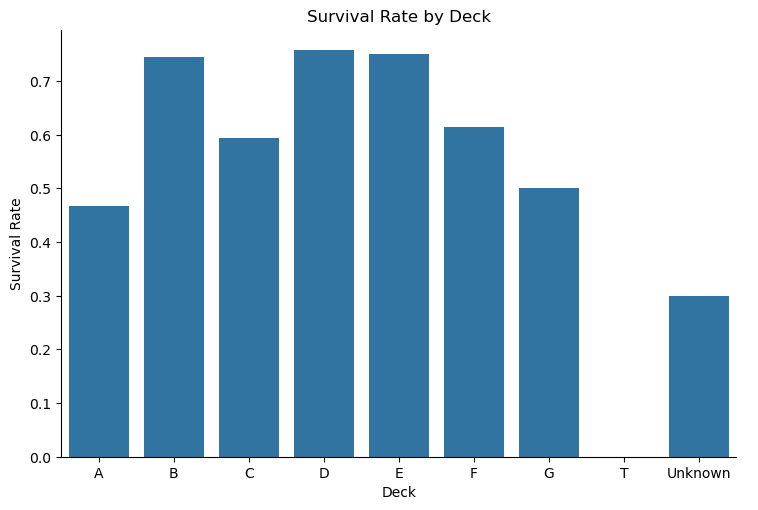

In [43]:
# 1) Survival rate by Deck
titanic_df['Deck'] = titanic_df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Unknown')

# Calculate survival rate by Deck
deck_survival = titanic_df.groupby('Deck')['Survived'].mean().reset_index()

print(deck_survival)

# Plot using catplot
sns.catplot(data=deck_survival, x='Deck', y='Survived', kind='bar', height=5, aspect=1.5)
plt.title('Survival Rate by Deck')
plt.ylabel('Survival Rate')
plt.xlabel('Deck')
plt.show()

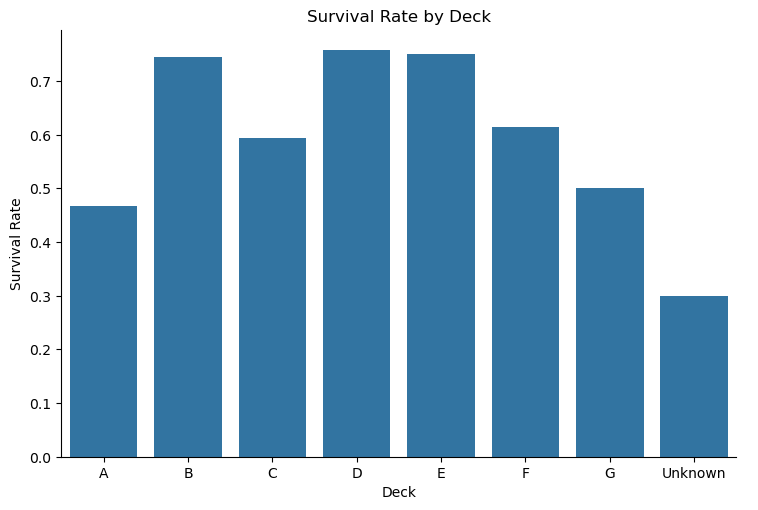

In [44]:
# Remove Deck T
deck_survival = deck_survival[deck_survival['Deck'] != 'T']

# Plot using catplot
sns.catplot(data=deck_survival, x='Deck', y='Survived', kind='bar', height=5, aspect=1.5)
plt.title('Survival Rate by Deck')
plt.ylabel('Survival Rate')
plt.xlabel('Deck')
plt.show()

         Alone  Survived
0        Alone  0.303538
1  With Family  0.505650


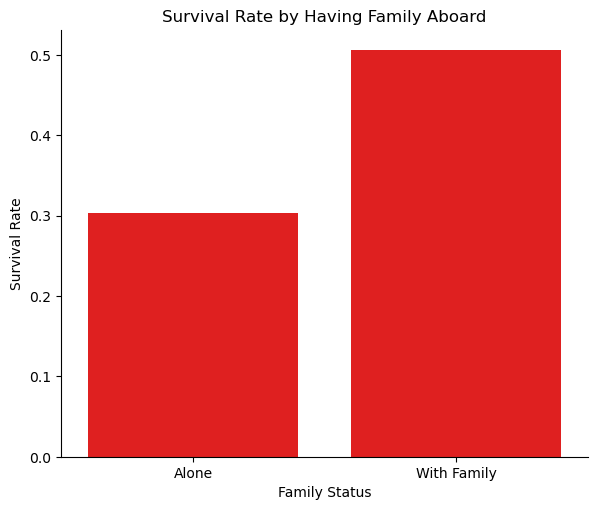

In [45]:
family_survival = titanic_df.groupby('Alone')['Survived'].mean().reset_index()

print(family_survival)

# Plot using catplot
sns.catplot(data=family_survival, x='Alone', y='Survived', kind='bar', height=5, aspect=1.2, color='red')
plt.title('Survival Rate by Having Family Aboard')
plt.xlabel('Family Status')
plt.ylabel('Survival Rate')
plt.show()